In [ ]:
# OSMnx dependencies

!apt install libspatialindex-dev
!pip install osmnx

import osmnx as ox

G = ox.graph_from_place('Veneto, Italy', network_type="drive")

filepath = "./data/veneto.graphml"
ox.save_graphml(G, filepath)

In [ ]:
# OSMnx dependencies

!apt install libspatialindex-dev
!pip install osmnx

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libspatialindex-dev is already the newest version (1.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [ ]:
# Cugraph numpy version error fix

!pip uninstall numpy
!pip install numpy==1.23.4

Found existing installation: numpy 1.23.4
Uninstalling numpy-1.23.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.23.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.23.4
  Using cached numpy-1.23.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 require

https://github.com/gboeing/osmnx-examples/tree/main/notebooks

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install nx-cugraph-cu11 --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


In [ ]:
# Make sure we are running in a GPU environment

!nvidia-smi

Tue Nov 14 14:32:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Install cugraph

!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/pip-install.py", line 28, in <module>
    if ('K80' not in gpu_name):
TypeError: a bytes-like object is required, not 'str'


In [ ]:
# Importing libraries

import cugraph as cg
import osmnx as ox
import networkx as nx

cg.__version__

'23.10.00'

In [ ]:
G = ox.graph_from_place('Veneto, Italy', network_type="drive")
#ox.plot_graph(G)

In [ ]:
G = ox.load_graphml('.data/veneto.graphml')

In [ ]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

25801083285.983784

In [ ]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
# convert node/edge GeoPandas GeoDataFrames to a NetworkX MultiDiGraph
G2 = ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=G.graph)

In [ ]:
G2.number_of_nodes()

228208

In [ ]:
G2.number_of_edges()

510028

In [ ]:
filepath = "./data/veneto.graphml"
ox.save_graphml(G, filepath)

In [ ]:
nx.__version__

'3.2.1'

In [ ]:
G2 = ox.get_digraph(G)

In [ ]:
nx.betweenness_centrality(G2)

{27371595: 0.0,
 27371611: 0.01974991854024112,
 27385331: 0.04848784253109764,
 27385338: 0.0,
 27385339: 0.0,
 54199258: 0.012704405809244522,
 54199272: 0.0298634676255644,
 54199284: 0.019911645254387263,
 54199286: 0.002358997036416391,
 54201673: 0.03294844567021974,
 54201851: 0.0,
 54202255: 0.004178885630498531,
 54202311: 0.013542578240158884,
 190392843: 0.056657090296203194,
 190392851: 0.01584392310198762,
 190399280: 0.1128193439896153,
 190399292: 0.06578981288750355,
 190399298: 0.058541936130829114,
 190399314: 0.04480516571242378,
 201408074: 0.005799896041831519,
 201408077: 0.028553342565439347,
 201408088: 0.09163948432093566,
 201408105: 0.005208129683936131,
 201413084: 0.4221366894753992,
 201413089: 0.42786781990411005,
 201413090: 0.3441733919455692,
 201415370: 0.050109219111235274,
 201415371: 0.12347038686848058,
 201418135: 0.27537247959627,
 201419390: 0.035096194806605356,
 201421759: 0.0657857398995596,
 201422511: 0.057851838275225304,
 201422514: 0.04

In [ ]:
nx.betweenness_centrality(G2, backend="cugraph")

{27371595: 0.0,
 27371611: 0.01974991854024112,
 27385331: 0.04848784253109764,
 27385338: 0.0,
 27385339: 0.0,
 54199258: 0.012704405809244522,
 54199272: 0.0298634676255644,
 54199284: 0.019911645254387263,
 54199286: 0.002358997036416391,
 54201673: 0.03294844567021974,
 54201851: 0.0,
 54202255: 0.004178885630498531,
 54202311: 0.013542578240158884,
 190392843: 0.056657090296203194,
 190392851: 0.01584392310198762,
 190399280: 0.1128193439896153,
 190399292: 0.06578981288750355,
 190399298: 0.058541936130829114,
 190399314: 0.04480516571242378,
 201408074: 0.005799896041831519,
 201408077: 0.028553342565439347,
 201408088: 0.09163948432093566,
 201408105: 0.005208129683936131,
 201413084: 0.4221366894753992,
 201413089: 0.42786781990411005,
 201413090: 0.3441733919455692,
 201415370: 0.050109219111235274,
 201415371: 0.12347038686848058,
 201418135: 0.27537247959627,
 201419390: 0.035096194806605356,
 201421759: 0.0657857398995596,
 201422511: 0.057851838275225304,
 201422514: 0.04

In [ ]:
cg.betweenness_centrality(G2)

{-2144608000: 0.20704951882362366,
 -2144607990: 0.0,
 -2144286389: 0.00795047264546156,
 -2144286387: 0.0,
 -2136453942: 0.13887137174606323,
 -2136453941: 0.0,
 -2129370703: 0.00795047264546156,
 -2129370687: 0.0,
 -2129140618: 0.4184384047985077,
 -2123813335: 0.0,
 -2118577234: 0.0,
 -2118452231: 0.034690942615270615,
 -2118452224: 0.0,
 -2092684763: 0.014230294153094292,
 -2015485618: 0.0,
 -2015485615: 0.027610784396529198,
 -2015485576: 0.01190534420311451,
 -2015485556: 0.0,
 -2015485424: 0.0,
 -2008058097: 0.0,
 -2008058095: 0.004610622301697731,
 -2008058093: 0.015707341954112053,
 -2008058090: 0.027570055797696114,
 -1919954783: 0.03566307574510574,
 -1906271198: 0.00795047264546156,
 -1906271197: 0.015361911617219448,
 -1906270189: 0.0,
 -1905435203: 0.0,
 -1905423832: 0.0,
 -1905423792: 0.013335554860532284,
 -1905422942: 0.05215229094028473,
 -1905420272: 0.0,
 -1886089867: 0.023680351674556732,
 -1882527765: 0.0,
 -1645086001: 0.0,
 -1645024256: 0.0,
 -1645024252: 0.0,
 

In [ ]:
# show some basic stats about the network
#stats documentation: https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.stats
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

{'n': 357,
 'm': 757,
 'k_avg': 4.240896358543417,
 'edge_length_total': 134095.90599999996,
 'edge_length_avg': 177.1412232496697,
 'streets_per_node_avg': 2.649859943977591,
 'streets_per_node_counts': {0: 0, 1: 69, 2: 3, 3: 270, 4: 14, 5: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.19327731092436976,
  2: 0.008403361344537815,
  3: 0.7563025210084033,
  4: 0.0392156862745098,
  5: 0.0028011204481792717},
 'intersection_count': 288,
 'street_length_total': 69401.5290000001,
 'street_segment_count': 462,
 'street_length_avg': 150.21975974025995,
 'circuity_avg': 1.1002173189241315,
 'self_loop_proportion': 0.008658008658008658,
 'clean_intersection_count': 161,
 'node_density_km': 14.335942240856905,
 'intersection_density_km': 11.565129874976998,
 'edge_density_km': 5384.849196502454,
 'street_density_km': 2786.936445857582,
 'clean_intersection_density_km': 6.465228853719781}

In [ ]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

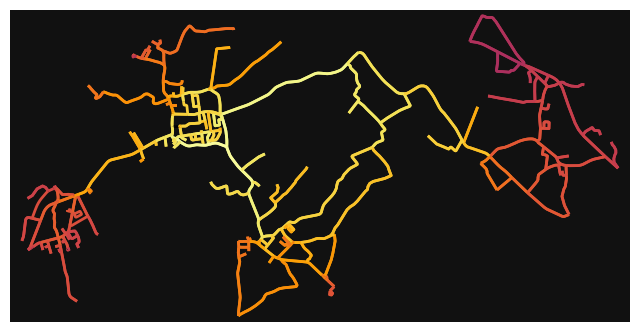

In [ ]:
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)